# 4.0 The Perceptron

The perceptron is the basis for neural networks.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Let's create a *perceptron*

In [35]:
class simplePerceptron:
    # Activation functions
    def __none(x):
        return x
    def __sigmoid(x): # define activation function
        return 1/(1+np.exp(-x))
    def __step(x):
        out = np.zeros(x.shape)
        out[x >= 0] = 1
        return out
    possibleActivations = {
        'none': __none,
        'sigmoid': __sigmoid,
        'step': __step
    }
    # Initialize
    def __init__(self, w=None, b_w=None, activation=None):
        if w is None:
            self.w = 0
        else:
            self.w = w
        if b_w is None:
            self.b_w = 0
        else:
            self.b_w = b_w
        if (activation is None) or (activation not in self.possibleActivations):
            self.activation = 'none'
        else:
            self.activation = activation
    def setWs(self, w, b_w):
        self.w = w
        self.b_w = b_w
    def predict(self, x):
        # x *should* be a mxn np array, where each row corresponds to an observation
        # Sum everything
        weightedSum = np.zeros(x.shape[0])
        for i in range(len(self.w)):
            weightedSum = self.w[i] * x[:, i]
        summed = weightedSum + (1 * self.b_w)
        return self.possibleActivations[self.activation](summed)

### Let us test out this perceptron

In [36]:
ourPerceptron = simplePerceptron(w=[0], b_w=1, activation='none')
ourPerceptron.setWs([1], 0)
ourPerceptron.activation
testInput = np.array([[100, -1, 0.1]]).T
ourPerceptron.predict(testInput)

array([100. ,  -1. ,   0.1])

### Remember the Iris dataset?

In [37]:
from sklearn import datasets
iris = datasets.load_iris()

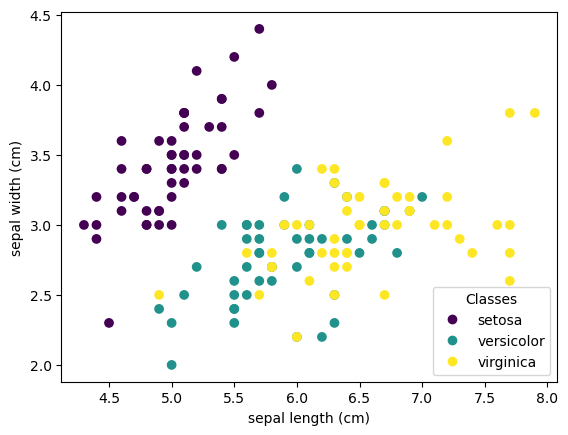

In [38]:
# Let's take a look at the dataset
fig, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes");

For the purposes of producing a linearly separable dataset, we're going to drop the *virginica* class from the dataset **and** only loot epal width and length.

[Text(0.5, 0, 'sepal length (cm)'), Text(0, 0.5, 'sepal width (cm)')]

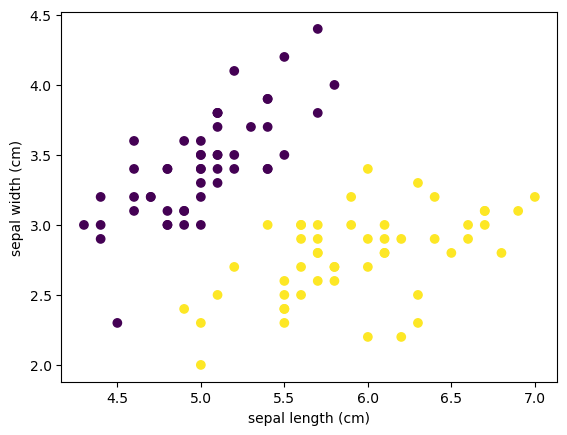

In [39]:
simpleInputs = iris.data[iris.target!=2,0:2]
simpleOutputs = iris.target[iris.target!=2]

# Shuffle these two arrays

# Random generator
rng = np.random.default_rng()

p = rng.permutation(len(simpleInputs))

simpleInputs = simpleInputs[p, :]
simpleOutputs = simpleOutputs[p]

fig, ax = plt.subplots()
ax.scatter(simpleInputs[:, 0], simpleInputs[:,1], c=simpleOutputs)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

### The perceptron rule

To train our perceptron, we will start with our weights set to 0.

In [40]:
percept = simplePerceptron(w=np.array([0, 0]).T, b_w=0, activation='step')


testArray = np.array([[1,2], [2,3], [3,4]])
percept.predict(simpleInputs)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Now, for some number of iterations, we're going to:

1. Make a prediction for one item in our dataset with our perceptron
2. Update our weights using the following rule:

    $w_j = w_j + \Delta w_j$

    where

    $\Delta w_j=\eta(t^i−o^i)x^i_j$

    where $w_j$ is the weight, $\eta$ is our **learning rate**, $t^i$ and $o^i$ refer to the target and output, respectively, and $x^i_j$ is the corresponding input.

    In the case of a 2D dataset, we are updating 3 weights: 2 for the inputs and 1 for the bias (for the latter, there is no input to consider).

3.  Keep going until we're happy with the solution. In our case, we will set a stopping point of 25 iterations.

In [41]:
iterations = 100
learningRate = .0001
whichItem = 0

# Now, for each iteration:
for i in range(iterations):
    # Make a prediction for some item
    thisInput = np.reshape(simpleInputs[whichItem, :], (1, -1))
    thisTarget = simpleOutputs[whichItem]
    out = percept.predict(thisInput)
    # Now, let's figure out the "error"
    error = thisTarget - out
    newWeights = np.zeros(percept.w.size)
    # Let's update our weights
    for j in range(len(percept.w)):
        update = (learningRate * error * thisInput[:, j])
        newWeights[j] = percept.w[j] + update
    percept.setWs(newWeights, percept.b_w + (learningRate * error))
    # Next item
    whichItem = whichItem + 1

percept.w

/var/folders/js/lzmy975n0l5bjbmr9db291m00000gn/T/ipykernel_70516/2113147933.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newWeights[j] = percept.w[j] + update


array([0.00523, 0.0001 ])

In [42]:
percept.predict(simpleInputs)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


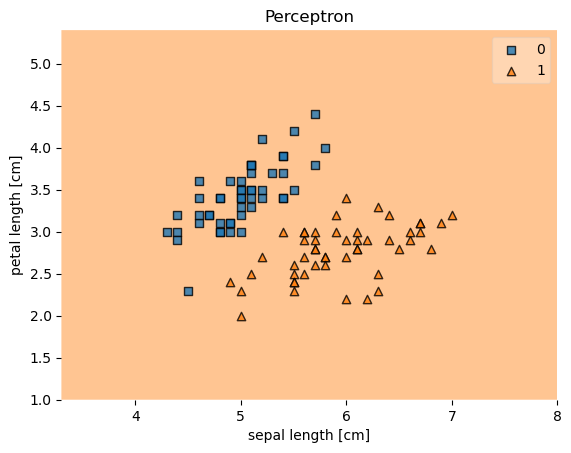

In [43]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(simpleInputs, simpleOutputs, clf=percept)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

Awesome! We just implemented an **online** algorithm. 

### What about fitting a line to some data with our little perceptron?

In [44]:
# We create a linear dataset with some noise

# How many data?
num = 100

xRange = [0, 5]
yRange = [0, 2.5]

x = np.linspace(xRange[0], xRange[1], num=num)
y = np.linspace(yRange[0], yRange[1], num=num)

noise_factor = 0.5

def noise(k):
    # Add some noise
    return k+((rng.random()*2)-1)*noise_factor

x = np.vectorize(noise)(x)
y = np.vectorize(noise)(y)

# Shuffle x and y

p = rng.permutation(num)
x = x[p] 
y = y[p]

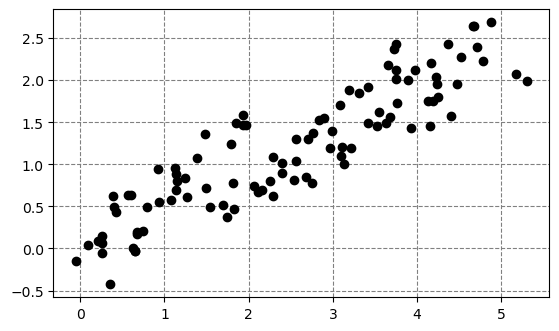

In [45]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='k')
ax.set_aspect('equal')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

We need to train our perceptron

We should define a cost function (here, mean square error)

In [46]:
def mseCost(prediction, target):
    mse = (np.square(prediction - target)).mean()
    return mse

What is the cost of a perfect return?

In [47]:
mseCost(y,y)

0.0

The other thing we would like to do is a define a learning algorithm (here, gradient descent)

In [48]:
def gradientDescent(perceptron, costFunction, trainInput, trainTarget, learningRate, numIterations, stoppingCriterion):

        weights = []
        biases = [] 
        costs = []

        numInputs = len(trainInput)

        previousCost = None
    
        for i in range(numIterations):
            # Run your prediction
            prediction = perceptron.predict(trainInput)
            # Determine your cost
            thisCost = costFunction(prediction, trainTarget)
            # Is the change in cost less than (or equal to) the stoppingCriterion?
            if previousCost and np.absolute(previousCost - thisCost) <= stoppingCriterion:
                break
            # If not, update previousCost
            previousCost = thisCost
            # Add this weight, this bias, and this cost to weights, biases, and costs, respectively
            weights.append(perceptron.w)
            biases.append(perceptron.b_w)
            costs.append(thisCost)
            # Great, let's now calculate the errors first
            er = np.subtract(trainTarget, prediction)
            # What does the weight update look like?
            weightUpdate = learningRate * np.dot(trainInput.T, er)
            # Do the same for the bias weight update
            biasWeightUpdate = learningRate * np.sum(er)
            # Now, update the weights and bias weight
            perceptron.setWs(perceptron.w + weightUpdate, perceptron.b_w + biasWeightUpdate)
        return {'weights': weights, 'biases': biases, 'costs': costs}
    

In [49]:
numIterations = 10000
# Initialize a weight and bias
ourPerceptron.setWs([0],0)
# Run our gradient descent
output = gradientDescent(ourPerceptron, mseCost, np.reshape(x[0:50], (-1, 1)), y[0:50], 0.001, numIterations, 1e-6)


In [50]:
# A function to plot outputs from gradient descent
def plotOutputs(gdOutput):
    # How many iterations were actually run?
    iterationsRan = len(gdOutput['costs'])
    toPlot = ['weights', 'biases', 'costs']
    pltCount = 3
    fig, axes = plt.subplots(1, pltCount, figsize=(12, 4))
    for i in range(pltCount):
        axes[i].plot(range(iterationsRan), gdOutput[toPlot[i]], color='r')
        axes[i].set_xlabel('Iteration #')
        axes[i].set_ylabel('Value')
        axes[i].set_title(toPlot[i].capitalize())
        axes[i].set_axisbelow(True)
        axes[i].xaxis.grid(color='gray', linestyle='dashed')
    fig.tight_layout()
    return fig

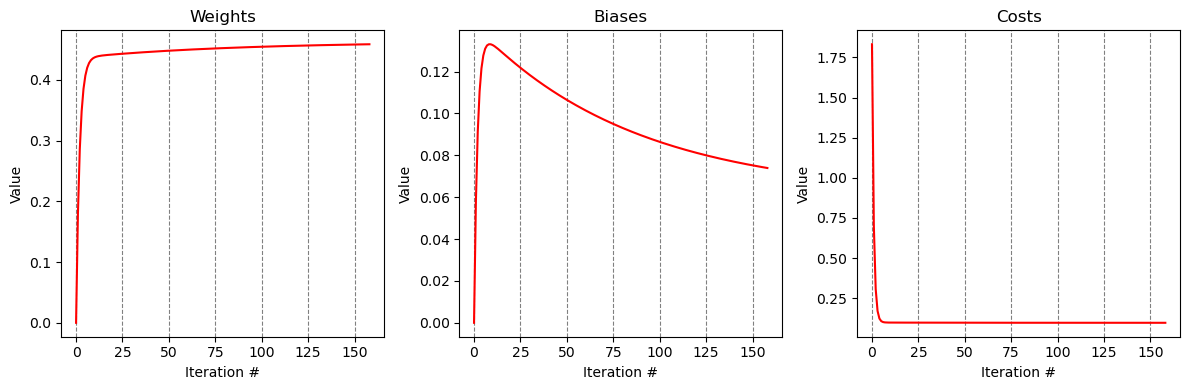

In [51]:
plotOutputs(output);

In [52]:
# Let's try out our little perceptron on data it hasn't seen before
testPredictions = ourPerceptron.predict(np.reshape(x[50:100], (-1,1)))
testCost = mseCost(testPredictions, np.reshape(y[50:100], (-1,1)))
'The mean square error of our little perceptron is: %f' % testCost

'The mean square error of our little perceptron is: 1.052873'

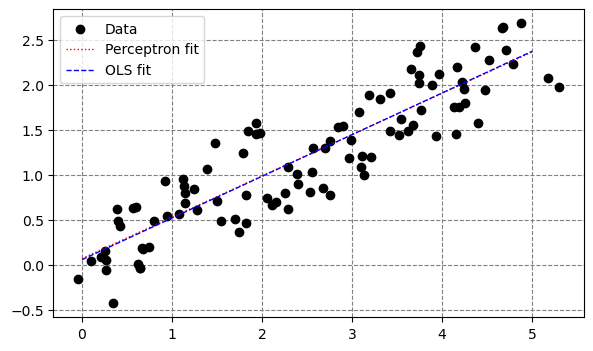

In [53]:
def compareOutputs(x, y, perceptron, xRange):
    fig, ax = plt.subplots(figsize=(12,4))
    ax.scatter(x, y, color='k')
    ax.set_aspect('equal')
    forLine = np.linspace(xRange[0], xRange[1])
    ax.plot(forLine, perceptron.predict(np.reshape(forLine, (-1,1))), color='r', linestyle='dotted', linewidth=1)
    # How well do we do relative to OLS?
    OLSoutput = LinearRegression().fit(x[0:50].reshape(-1,1),y[0:50])
    ax.plot(forLine, OLSoutput.predict(forLine.reshape(-1,1)), color='b', linestyle='dashed', linewidth=1)
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    ax.legend(['Data', 'Perceptron fit', 'OLS fit'])
    return fig;

compareOutputs(x, y, ourPerceptron, xRange);

Now, let's explore how our learning choices impact our model


In [54]:
!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display, clear_output
%matplotlib inline


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [55]:
# Create inputs
learningRateSlider = widgets.FloatLogSlider(
    value=.001,
    min=-6,
    max=1.0,
    step=1,
    description='Learning Rate:'
)

iterationsSlider = widgets.Dropdown(
    options=[1, 10, 100, 1000, 10000, 100000],
    value=100,
    description='Number of Iterations:'
)

stoppingCriterionSlider = widgets.FloatLogSlider(
    value=1e-4,
    min=-8,
    max=1,
    step=1,
    description='Stopping Criterion:'
)

startingWeight = widgets.BoundedFloatText(
    value=0,
    min=-50,
    max=50,
    description='Weight'
)

startingBias = widgets.BoundedFloatText(
    value=0,
    min=-50,
    max=5000,
    description='Bias'
)

# Create the "Update" button
updateBtn = widgets.Button(description="Update")

outputWidget = widgets.Output()

# Define the function to run when the "Update" button is clicked
def updateClick(_):

    with outputWidget:
        clear_output(wait=True)
        learningRate = learningRateSlider.value
        numIterations = iterationsSlider.value
        stoppingCriterion = stoppingCriterionSlider.value
        ourPerceptron.setWs([startingWeight.value], startingBias.value)
        output = gradientDescent(ourPerceptron, mseCost, np.reshape(x[0:50], (-1, 1)), y[0:50], learningRate, numIterations, stoppingCriterion)
        display(compareOutputs(x, y, ourPerceptron, xRange))
        display(plotOutputs(output))
        
    
# Set the function to be called when the button is clicked
updateBtn.on_click(updateClick)

# Display the widgets
display(learningRateSlider, iterationsSlider, stoppingCriterionSlider, startingWeight, startingBias, updateBtn, outputWidget)

FloatLogSlider(value=0.001, description='Learning Rate:', max=1.0, min=-6.0, step=1.0)

Dropdown(description='Number of Iterations:', index=2, options=(1, 10, 100, 1000, 10000, 100000), value=100)

FloatLogSlider(value=0.0001, description='Stopping Criterion:', max=1.0, min=-8.0, step=1.0)

BoundedFloatText(value=0.0, description='Weight', max=50.0, min=-50.0)

BoundedFloatText(value=0.0, description='Bias', max=5000.0, min=-50.0)

Button(description='Update', style=ButtonStyle())

Output()